## Análisis de los datos

In [59]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import math
url = "https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Examinar el nombre de las columnas

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Es necesario chequear el tipo de datos de cada una de las variables así como la presencia de datos faltantes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Como se aprecia en el análisis inicial de las variables contamos con un dataframe de 10 columnas resumida de la siguiente forma 
- Id del pasajero: presenta un tipo de datos entero con 891 valores no nulos
- Survived (determina si el pasajero sobrevivió o no): 
- Pclass (clase del pasajero): presenta un tipo de datos entero con 891 valores no nulos
- Nombre: presenta un tipo de datos objeto con 891 valores no nulos
- Sexo: presenta un tipo de datos objeto con 891 valores no nulos
- Edad: presenta un tipo de datos flotante con 714 valores no nulos
- SibSp (# de hermanos(as) / cónyuges a bordo): presenta un tipo de datos entero con 891 valores no nulos
- Parch (# de padres/hijos a bordo): presenta un tipo de datos entero con 891 valores no nulos
- Ticket (# de ticket): presenta un tipo de datos objeto con 891 valores no nulos
- Tarifa: presenta un tipo de datos flotante con 891 valores no nulos
- Cabina: presenta un tipo de datos objeto con 204 valores no nulos
- Embarcación (puerto de embarcación): presenta un tipo de datos objeto con 891 valores no nulos



Es posible contar la cantidad de celdas nulas por columnas de la siguiente forma



In [31]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Es posible visualizar la ausencia de datos visualizándolo en un mapa de calor usando la biblioteca seaborn

<AxesSubplot:>

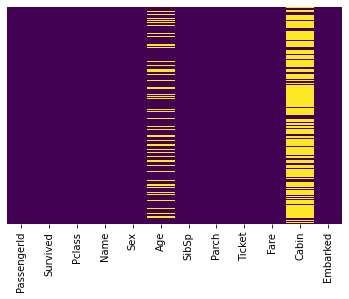

In [32]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Es posible visualizar la cantidad de los pasajeros que sobrevivieron mediante un histograma


<AxesSubplot:xlabel='Survived', ylabel='count'>

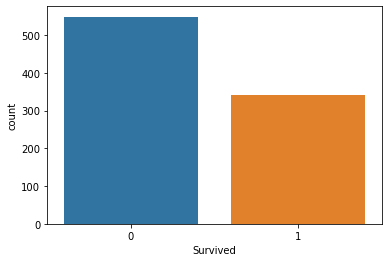

In [33]:
sb.countplot(x='Survived',data=df)

### Sexo

Es posible visualizar además la cantidad de los pasajeros según su sexo

<AxesSubplot:xlabel='Survived', ylabel='count'>

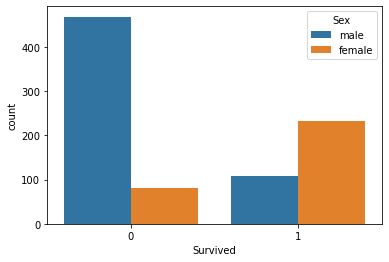

In [34]:
sb.countplot(x='Survived',hue='Sex',data=df)

Se puede decir que el Sexo es determinante para definir si murieron o no

### Clase

Para tener una mejor idea de que representa la columna clase se puede realizar un conteo por las categorías existentes

In [35]:
df.Pclass.value_counts().reset_index()

,index,Pclass
0,3,491
1,1,216
2,2,184


Es posible visualizar además la cantidad de sobrevivientes según su clase

<AxesSubplot:xlabel='Survived', ylabel='count'>

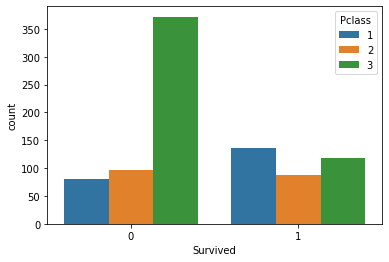

In [36]:
sb.countplot(x='Survived',hue='Pclass',data=df)

Se puede decir que la clase es un componente determinante en que el pasajero haya sobrevivido o no

### Lugar de embarcación

Es pobsible determinar también la distribución de muertes por puerto de embarcación

<AxesSubplot:xlabel='Survived', ylabel='count'>

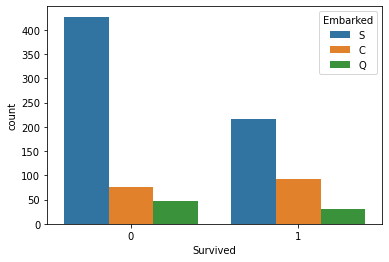

In [37]:
sb.countplot(x='Survived',hue='Embarked',data=df)

Dada la diferencia existente entre la distribución de pasajeros, es posible determinar que el puerto de embarcación es necesario tomarlo en consideración para la supervivencia

### Edad

Mediante el chequeo de la distribución de la variable Edad, se puede arribar a la conclusión que tiene un comportamiento similar a la normal

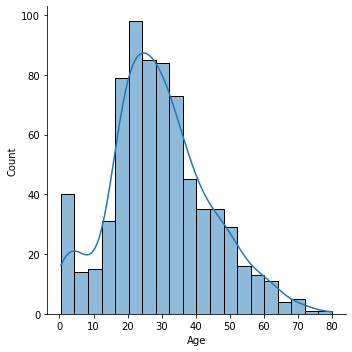

In [38]:
sb.displot(df['Age'].dropna(),kde=True)

Si se toma en cuenta la sobrevivencia de los pasajeros menores que 20 años se obtiene el siguiente resultado

In [45]:
survived = df['Survived']
age_youth = df['Age'] < 20
pd.crosstab([age_youth], survived )

Survived,0,1
Age,,
False,464,263
True,85,79


Si se toma en cuenta la sobrevivencia de los pasajeros menores que 20 años y el sexo se obtiene el siguiente resultado

In [46]:
sex = df['Sex']
pd.crosstab([sex,age_youth], survived)

Survived        0    1
Sex    Age            
female False   59  180
       True    22   53
male   False  405   83
       True    63   26

A partir de lo anterior se puede decir que la variable edad afecta de alguna forma a que haya sobrevivido o no el pasajero, por lo que es necesario tomarla en consideración

### Numero de padres/hijos en la embarcación

Se chequea también la cantidad de sobrevivientes de esta variable en la sobrevivencia de los pasajeros

<AxesSubplot:xlabel='Survived', ylabel='count'>

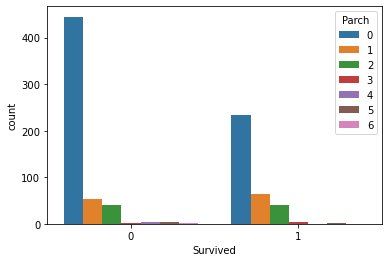

In [47]:
sb.countplot(x='Survived',hue='Parch',data=df)

Se puede analizar que la mayoría de los pasajeros no presentaban muchos padres o hijos(as) en la tripulación. Se puede decir que la mayoría de estos no sobrevivieron

### Número de hermanos(as) / cónyuges a bordo

<AxesSubplot:xlabel='Survived', ylabel='count'>

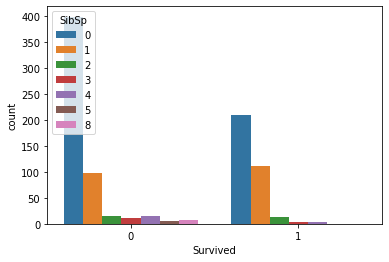

In [48]:
sb.countplot(x='Survived',hue='SibSp',data=df)

Se puede analizar que la mayoría de los pasajeros no presentaban muchos hermanos(as) en la tripulación. Se puede decir que la mayoría de estos no sobrevivieron

## Análisis estadistico

Visualizando el análisis estadístico de las variables

In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Partiendo de este análisis se puede determinar algunas conclusiones:
- La mayoría de los tickets que existían en la embarcación eran de 2da y 3ra clase, con una edad promedio de los pasajeros entre 30 y 31 años de edad
- La gran parte de los pasajeros tenían a lo sumo 1 familiar en la nave
- La tarifa de promedio del pasaje era de 35 libras y teniendo un costo máximo de 512 libras.



## Recodificación de variables

Ya que la variable Sexo es binaria, se pueden sustituir sus valores por 0 y 1

In [50]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)


En el caso de la variable puerto se puede realizar el mismo procesamiento.
Aquí el nombre de los puertos se sustituye mediante el uso de la función LabelEncoder que se encuentra en sklearn. Esta función asigna un número a cada categoría de valor presente en la columna deseada.

In [51]:
df['Embarked'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Propuestas de imputación de valores

### Eliminación de columnas 

A partir del porcentaje de filas nulas por columnas se puede tomar decisión respecto a eliminar o no determinada

In [52]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

Tomando en consideración de que la columna asociada a la cabina de los pasajeros presenta un alto porcentaje de valores nulos, una de las propuestas sería su eliminación

In [53]:
df.drop(columns="Cabin",inplace=True)

In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Imputación de valores usando la media o mediana

Dado que la columna Age presenta un pequeño porcentaje de valores nulos, es posible sustituir sus valores por la media (29 usando redondeo por exceso) o la mediana

`df['Age'].fillna(df['Age'].mode(),inplace=True)`

### Imputación de valores utilizando la generación de valores aleatorios dentro del intervalo de la distribución que presenta la columna

Partiendo a la similitud que presenta la variable edad respecto a la  distribución normal es posible generar valores aleatorios con la media y la desviación estándar que presentan los datos. Esta imputación de valores sería una mejor solución ya que sustituye por varios valores, no con uno como lo hace con la media

In [55]:
def random_age(col):
    if np.isnan(col) == True:        
        while True:
            col = math.ceil(np.random.normal(29.699118,14.526497,1))
            if col > 0:
                break
    else:
        col = col
    return col

In [56]:
df['Age'] = df['Age'].apply(random_age)
df['Age'].isna().sum()

0

### Imputación de valores usando moda

Dado que la variable Embarked solo presenta 2 valores faltantes es posible la sustitución de valores nulos usando la moda

In [57]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [58]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64